In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version = 1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# for i in mnist.keys():
#     print(mnist[i])
print(mnist['DESCR'])
print(mnist['frame'])
print(mnist['target_names'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

5


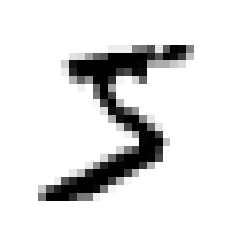

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

i = 0
sample = X[i]
print(y[i])
sample_image = sample.reshape(28,28)
plt.imshow(sample_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [8]:
import numpy as np
import pandas as pd

y = y.astype(np.uint8)

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[:60000]

## Creating a binary classifier of 5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

## Model Performance

In [12]:
# K fold Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

### For skewed datasets - Accuracy is not an effective scoring measure

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred, labels = [False, True]) # labels appear in sorted order in case of default condition

array([[53892,   687],
       [ 1891,  3530]])

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

## We can alter the threshold limit of the ml algorithms using the decision function feature of the models

In [16]:
for y_temp_pred, y_temp_score in zip(y_train_pred,sgd_clf.decision_function(X_train)):
    print(y_temp_pred, y_temp_score)

True 2164.2203023926586
False -5897.373593538882
False -13489.148057785074
False -4623.845159432226
False -6873.052484528888
False -3908.2757629071402
False -4851.942239699034
False -4988.524077546989
False -2226.7813286640767
False -4081.3369283115107
False -5711.4778968723085
False 4742.52813157512
False -10322.619700870207
False -5028.508042401306
False -2774.489337011428
False -4757.621753378165
False -7995.787379076978
False -5478.980844192126
False -2494.255721486975
False -8689.984484872002
False -22773.425254929414
False -758.371770863264
False -5694.605292669609
False -4975.036174786007
False -1371.184727617244
False -8055.977049267804
False -1387.966682626856
False -7917.874396865428
False -21252.588387148713
False -7574.53848281839
False -11673.837283410754
False -14707.591765925317
False -1505.5219519629043
False -10489.628986624582
False -4962.99098881267
True 3930.4131596686975
False -2941.4937416549083
False -8261.436236593787
False -12473.816420149866
False -2579.398325

False -5476.709733232163
False -1230.6582552289092
False -4781.822996262506
False -3385.674094780403
False -9726.067117609191
False -3977.770224206829
False -14009.028855489029
False -2828.284752517693
False -15627.122546172448
False -3979.9060586767246
False -6734.5516729745
True 6876.475703846505
False -11381.727228873639
False 96.53868551416745
False -11121.67003202192
False -4434.029931079273
False -2711.3696059521762
False -9536.549636993619
False -12669.94501621209
False -3953.303309453473
True 2137.1273502212516
False 459.78255715754193
False -893.7877206180733
False -6963.173821263227
True 8657.502953062263
False -4502.864745167262
False -15072.753216672692
False -6199.342096570748
True 4103.2567670076805
False -803.1029642763714
False -4462.80198524336
False -1769.8536069616096
False -4942.518914307776
False -2178.2317122805307
True 3551.500226197134
False -6565.488137022819
False -12067.51418137351
False -3695.948853184217
False -5284.384219507332
False -2743.5410048892263
Fa

False -1529.7482977012787
False -3889.5002229331885
False -12428.091572110787
False -844.8678371419844
True 8769.460983322555
True 9909.397608379688
False -10213.457152291952
False -3742.8835193130017
False -7180.820444068844
False -12173.409175159586
False -3044.3275818922093
False -3301.4365880350933
False -3501.8319719273077
False -4458.558208362907
False -4412.64508892121
False -993.1120424452263
False 5661.197744478155
False -4406.068141248273
False -2276.226280161938
False -1514.1796472885303
False -3412.077415776438
False -4328.22488918457
False -3678.0951457829306
False -3115.499750581419
False -3641.5154068124657
False -9315.423479741996
False -5713.237188536505
False -5561.479978317978
False -5200.535109692695
False -7199.5987732483745
False -1987.5762356299144
False -5049.650223640054
False -547.6340112418653
False -5024.978302249609
False -4601.539182004046
False 4162.6257133400895
False -3830.3850943425687
False -9750.517994428603
False -3828.070053386996
False -21053.7354

False -1324.2974779926903
False -4343.610846606741
False -205.62366733204033
False -5488.386046716407
False -2955.7926060503623
False -5933.440815913607
False -2566.622367631843
False -2375.182426801819
False -6146.448291891631
True 7364.003106923725
False -2052.8450498871252
False -2595.898570774638
False -5323.86124617762
False -3894.437117496451
False -3416.855325599463
False -3643.3116554559256
False -4269.634828618614
False -6784.458238060156
False -2428.134804804755
False -9840.46151928161
False -2372.9433917108845
False -9029.940578585654
False -4022.020976891584
False -8115.854328387241
False -15251.585946525804
False 6958.028599847599
False -1832.4099184151364
False -1686.0435460303122
False -6708.065373099657
False -3888.4445084730905
False -9061.535309190214
False -7556.801922067743
False -1676.2694710177182
False -5576.546571655594
False -7977.407209048971
False -3127.9410038013366
False -12951.216913657472
False -6266.39391074404
False -2973.220262240454
False -3960.364184

True 4819.071613657561
False -7705.689736647265
False -683.8149007320083
False 3334.0355990812877
False -7504.57125110801
False -2092.990091387298
False -8610.416108917374
False -2941.243410420311
False -5134.147823842484
False -8777.011197585649
False 2854.2370857430706
False 827.7764465643862
False -5473.247631323968
False -8098.8206475418
False -9297.926790703566
False -4466.259903342774
False -1123.169230231269
False -4878.823909518622
False -6597.258587604237
False 170.35362685752415
False 1796.7898325912665
False -3470.4443398666854
False -2301.8235206328363
False -6617.752975756246
False -8864.801455433304
False -3210.9191840528547
False -6332.992478946231
False -2333.2209149158552
False 60.26854840543277
False -11503.963483126421
False -1828.9052811164672
False -4856.873555850119
False -1560.596218407464
False -3864.582154114918
True 2746.674146786655
False -3364.082154078691
False -6241.511404300235
False -5917.22925352584
False -6702.787498107547
False -5838.397925247155
Fals

False -5305.372994418337
False -13149.934590160305
False -2598.4939269283495
False -4244.838787561371
False -7728.701383185909
False -4199.510006769944
False -5316.183956750407
False -8466.983981211035
False -15223.859844600294
False 954.4579978288081
False -8209.775260953618
False -17886.66945779182
False -4738.448054252121
False -12648.777732119754
False -582.3735715749222
False -22053.374301714764
False -13195.03535336338
False -3552.5243957952216
False -1798.7937107859575
False -2651.686176645614
False -7525.7538758324745
False -8451.72144615305
False -6353.931745450042
False -4193.801896756832
False -6026.158903405122
False 503.75857305410966
False -250.6735275265993
False -5978.185258053786
False -5706.432920577384
False -2290.134655723319
False -5196.306673445358
False -4614.750953373113
False -2580.1374651504348
False 2198.929181460723
False 1857.3881214556818
False -9998.442145316916
False -5139.820371479657
False 4151.118146817434
False -8697.837494274783
False 5797.310298423

False -5423.014729138727
False -10477.664687624825
False -9877.949842097303
False -7789.912600061556
False -7310.586159832832
False -3135.3198481905265
False -11046.109745043492
False 366.54288814937644
False -20507.692581773998
False -1101.8924698058784
True 9614.651056901774
False -1558.2574692038186
False -12485.1182827316
False -3391.034251350823
False -7482.9723373918105
False -594.8545709808539
False -12085.20332562293
False -3227.0038375691865
False -14287.399281427655
True 3913.9394119191893
False -6681.543510851262
False -5906.85898573558
False -3964.9545200850134
False -6667.362490406855
False -12144.721494475081
False -5200.622272380046
True 5978.817876801159
False -872.6727341372471
False -11039.70851734635
False -5285.762087255642
False -3474.390369010004
False -4393.797029590666
False -13608.832188576253
False -2757.1035189100476
False -27259.13019082519
False 184.73756203495606
False -20329.39189295777
False -12526.56239691099
False 6968.555760473531
False -12442.0313262

False -92.799588619703
False -13546.623133266872
False -5011.696800731079
False -12068.923427687872
False -6880.762547125599
False 1072.4407129796818
False -9438.836081612037
False -5059.385249770749
False -9786.971521826945
False -4247.740259069749
False -1624.9690002474183
False -8953.743655345053
False -7292.453531833292
False -11190.908583673547
False -10382.024209578816
False -6343.929652848415
False 256.124499584978
False 2278.201204279848
True 8217.765107742292
False -4917.224999985586
False -10557.440859423952
False 4047.383393053149
False -7068.440546406837
False -2461.720331169504
False -10031.60162047033
False -1965.2758366137375
False -11540.891872843742
False -920.1408359064278
False -5334.256616821757
False -1749.958898092815
False -8816.834783097487
False 679.8613675659387
False -1678.257477570021
False -7364.798561632064
False -5741.15923218226
False -9572.802341563445
False -1858.5461729396304
False -9382.950156231229
False -9238.222442353175
False -8349.706935170008
F

False -5245.572418461051
False -2708.526707768934
False -5671.557386453025
False -1784.9780763240817
False 2248.1314720401733
False -2840.747622085377
False -9466.809725567502
False -13269.265189095211
False -5064.084364525413
False -8808.135946983744
False -9646.449233248184
True 9074.665662579137
False -2529.8278598018687
False -8421.391620455264
False 2606.5723310062776
False -1845.9933514798568
False 1933.714742773062
False -14479.643908177839
False 683.5473032534545
False -1746.800122333704
False -6907.605168061739
False -4694.47970867143
False -4630.136910795292
False -4328.026855560993
False -6937.492207311666
False -4829.581175451691
False -4494.1143087435175
False -3199.7763062103077
False -5443.465884599208
False -5414.101821467716
False -9042.596600667668
False -8244.817450133907
False -2095.939676698057
True 10688.360078148253
False 830.3515809746409
False -6787.012453425271
False -8411.435549752598
False -3321.4289191135313
False -8404.88370493267
False -1284.45785454677
F

False -13735.181824330131
False -7975.300661243751
True 8763.494174455256
False -11631.630321397646
False -3867.405527856984
False -2425.5722218218916
False -3099.4248592859067
False -10917.857870819334
False -16063.617242254424
True 5978.15892688995
False -20129.83048165107
False -1342.412673453407
False -3843.2830800405764
False -4335.714604511574
False -11771.22519899382
False -6178.9725253852785
False -12984.969095078348
False -6926.13386330753
False 336.79461189606127
False -7646.631786779267
False -2448.9994600504806
False -6740.25699378238
False -5148.724214231472
False -5941.191321997302
False -6875.395417541855
False -2166.6042099006927
False -10153.517813338494
False -5817.368009549572
False -2104.872108810542
False -5305.734196590244
False -8036.596948899084
False -9003.24996937601
False -3624.7243868839787
False -13502.892567496301
False -6897.6748975151095
False -5618.730522718194
False -9685.470922043536
False -3676.3902436346207
False -5980.0491449434285
False -7674.7560

False -8244.806990612737
False -3113.0347898062355
False -5086.2934170465915
False -9350.157461662866
False -3151.006342554181
False -6558.032589470987
False -3207.936128269572
False -4733.8116966303105
False -3538.2694613944022
False -7025.026555512033
False -6885.543246155554
False -5615.797672642043
False -1679.723902609113
False -8821.372821207571
False 698.1104449147714
False 2288.859457587312
False 941.3082862920646
False 1132.9448661429494
False -7988.063370450406
False -8275.936621121386
False -4473.396086812626
False -3701.456837670936
False -5906.9426619150145
False -10199.27334264117
False -1158.5984217409198
False -9530.840829676385
False -1683.630185567278
False -3855.261325070126
False -2464.0228206964002
False -8880.337332675104
False -8943.328062958857
False -4320.652892282297
False -3656.9313481979825
False -4171.309739828043
False 987.9800697572592
False -5954.873771873302
False -1631.4322877784307
False 1876.5199824932567
False -2285.010884359841
False -7570.03670438

False 4175.5871534746975
False -3547.1767906534515
False -5014.384897982412
False -6761.258320118503
False -1876.051229595991
False 1009.3997769897143
False -7911.941058469783
False -4181.51614176902
False -7314.136819029968
False -9803.409009899018
False -5267.822611770175
False -8383.761048136512
False -17481.738811049592
False -8697.029321844344
False -10028.705727374205
False -10592.30384212054
False -3365.3603077141815
False -6679.152464034162
False -3378.490494810064
False -7218.942613939501
False -555.75269251358
False -7508.636518805247
False -6812.693370075753
False -8157.131090209802
False -5264.679873945855
False 2108.6558330000917
False -7742.277145933177
False -15200.149501964777
False -27237.133117957717
False -6036.111487601528
False -1770.2838419820785
False -2916.151713530029
False -3602.087888548578
False -13887.839948078017
False -6542.359343835221
False -11148.844568467051
False -6269.221468292264
False -6734.814555636089
False -12066.757609255712
False -15099.49193

False 1096.5513066706844
False -2578.680105033115
False -1940.0523497410863
False -2376.514272651787
False -4111.942885399928
False -9038.605944228175
False -1205.45359549833
False 165.64196067596805
False -13507.639796052703
False -3060.622820458898
False -4806.158818333963
False -11860.463054740536
False -9812.47183739296
False -15883.644424461112
False -9648.189000470675
False -7355.382202283645
False -3711.7134453166836
False -4755.439199709201
False -1048.916383550558
False -41005.625815010775
False -3571.738538407126
False -18682.74649538353
False 4098.430743380068
False -1822.4880154846785
True 4424.253233152633
False -10271.184650913576
False -7417.95176246619
False -19179.874345401735
False -4918.717225179576
False -4263.308212179763
False -709.9239604991333
False -7613.826540785126
False -6564.571185561777
False -3366.4557683585263
False -1123.1915438792096
False -6398.325444940334
False -886.1194961096664
False -3956.3651603052776
False -8032.771552913604
False -4456.6817700

False -3712.29011365074
False -21425.733228733363
False -3617.8845565488564
False -7239.273833542956
False -4145.623244767011
False -3095.5283385475404
False -9407.223918469434
False -3544.09890186732
False -5867.590452211978
False -2648.3614431314154
False -2976.880397772311
False -7501.935451468674
True 7327.555157934222
False -3644.7404262120244
True 5108.208374632347
False -11368.68280986288
False -6777.576569635851
False -3874.0152486994184
True 11096.251467026525
False -715.9988510986138
False -226.6242963682073
False -6712.758212142186
False -6363.674441896399
False -2466.095898032677
False -3201.74339371897
False -624.6153986622363
False -3034.7159781253176
False -3761.5335450184466
False -5516.805963626911
False -6554.944241163069
False 224.62390468213326
False -9963.312793449462
False -16.281906692711217
False -5508.171279251408
False -4548.726264297504
False -6241.5504531855095
False -5303.47424245474
False -5167.499754206539
False -4733.637371259229
False -4106.922314656374

False 422.3695429034874
False -3371.203694218523
False -5632.374621013707
False -2601.69593537957
False -4406.317077880723
False -8024.655660847538
False -6495.956021443894
False -5162.5565839294295
False 4083.5489349376685
False -4419.440291961019
False -4045.378484970195
False -6651.032386765798
False -3516.0694737920567
False -3971.408742695038
False -4193.511122032943
False -7717.46227773731
False -7942.143975294951
False -1727.6361854283273
False 3372.2135530726227
False -5964.991616523179
True 3512.514099777749
False -10025.91303489872
False -4156.196427290831
False -4091.185614585701
False -3134.195100883827
False -11105.424301861514
False -3509.4458069186703
False -528.0698232799773
False -6058.960662892726
False -6530.991237609226
False -2907.86149609092
False -11816.224853480826
False -4480.1843168370115
False -10220.42110229251
False -7488.476138069595
False -11376.475851337225
False -4122.004248628314
False -6467.084253166346
False -6977.112878089391
False -2553.85896112198

False -4769.44240827094
False -5274.471381496677
False -1798.2881672041206
False -6502.818862727767
False -7816.85423780951
False -5575.354883406362
False -6496.1993796640045
False -4325.5298189180785
False 1557.676783354651
False -14231.825049813759
False -10825.410336304873
False -3041.117903124108
False -7150.634262477787
False -9431.966964613006
False -9114.780553820108
False -5838.491363647616
False -8588.019482292488
False -1902.5124266166824
False -3346.0806187609205
False -5336.070298002483
False 807.676033755523
False -2223.3499080213705
False -2503.1191207524143
True 4875.94631255307
False -6764.7922440809825
False -9179.51593243608
False -1705.210272142709
False -11557.187111410893
False -4362.407305625314
False -4420.449287221658
False -561.9489135720331
False -3156.3372124618854
False -20490.987329929525
False -566.2331339385727
False -1028.781802968175
False -8848.495757343127
False -5784.903046682616
False 141.1924784591303
False -8442.001063354624
False 3523.53355525559

False -3677.168432100487
False -9056.354359103521
False -6176.351369077934
False -8476.627660845836
False -9501.14275913042
False -2953.7941399744686
False -7133.463213237411
False -6420.474529533977
False 1077.7234690837713
False -4936.905637296625
False -12174.273131708402
False -3187.192106182757
False -17630.4251054982
False -3421.0593562960094
False 1210.4457431733451
False -3314.448931179156
False -1878.3732435647212
False -5512.0426971345105
False -7756.311733064401
False -11256.983478455391
False -21327.696125459766
False -12833.483135139773
False -7774.517577719963
False -1867.374009828859
False -6016.0243235196285
False -9904.240897552196
False -9773.19981735977
False -6776.450427725744
True 4053.4178401647177
False -6427.733438066627
False -4631.945710865972
False -9921.34221664371
False -2977.577001962919
False -7193.30004887121
False -4860.738000718891
False 1821.3711047896265
False -904.5659097802427
False -612.3868223948223
False -16986.094121304526
False -7225.992332023

False -3927.159384612487
False 1373.1491922156147
False -5313.697379630701
False -15495.762101897319
False -7669.55069221915
False 2429.331540459524
False -6598.5534764752365
False -7268.668577938432
True 1727.5833568076766
False -8989.349264131692
False -4666.946061957066
False -4753.036996067964
False 1798.4354641126104
False -1060.237073274106
False -6036.552879445694
False 2745.5633455111147
False -8572.396442365676
False -6366.5898594344635
False -6349.261220056983
False -6705.316610617887
False -5939.074314666933
False -2844.990004363007
False -7292.424942471926
False -24505.623269865882
False -11145.646743825659
False 3469.984287175075
False -3455.393784463332
False -10327.902456972415
False -1129.757334729313
False -17923.230369622837
False 1399.9346344275943
False -2665.9125216861366
False -12887.404064916085
False -1796.530967443302
False -3529.297283095958
False -9900.01385590661
False -1717.4960271309096
False -9694.04563849191
False -1441.3981067556745
False -6805.74964181

False -12661.52858720337
False -770.4762274648464
False -9928.279669189133
False -3877.0345641592085
False -7321.734616086273
False -4509.584639645686
False -10243.314904880048
False -5717.022838336791
False -16115.197330919993
False -5899.475260235538
False -11054.798818936404
False -8359.167921814043
False -3666.8379104956566
False -2092.7481277694606
False -6495.704992906234
False -4772.560043241905
False -2299.2232833704466
False 2680.03374049412
False -3642.271281629549
False -6795.880036499813
False -2625.55410592943
False -13868.813379565729
False -6226.209123058005
False -17152.986260407957
False -760.3988263009659
False -4214.0647808133435
False -121.05633698224062
False -17594.145903471228
False -7338.158158128756
False -4564.207054723072
False -29908.076753057336
False -7413.803515889742
False -551.3917689821305
False -26029.33929550556
False -115.05117653291981
False 914.6560286630952
False -4956.330364960931
False -11577.770754153848
False -9901.087002904422
False -6299.96

False -3336.6663513179137
False -3036.9884836884894
False 635.7591400996149
True 5220.510871828664
False -5092.776926320081
False -7461.9012809053975
False -1600.6973299133494
False -8967.071178762835
False 924.1044638807746
False -982.1846307630585
False -3695.2257515378997
False -5708.490657281557
True 6546.827818089028
False -7945.065668547702
False -7945.981225405447
False -3474.781555147779
False -5145.864580813158
False -4153.34585879068
False -3500.4213310090317
True 7537.445696243379
False -4734.449030195022
False -221.90844637683608
False -1207.7177334436562
False -11379.06423447546
False -2991.333365798516
False -2300.0677154773657
False -11321.055723353451
False -6600.026177226033
False -11647.216404348734
False -5445.105937708999
False -2546.9333627031883
False -2861.8340192047717
False -2497.320361544301
False -2890.3724773684535
False -5521.932524196772
False -8458.615666005111
False -9832.728445734341
False -5043.466554008626
False -10764.20051403369
True 4847.9440792371

False -1195.0275435895555
False -3967.787656046812
False -4586.009580474032
False -8251.475982082058
False -5380.454932573128
False -4859.922855274866
False -7248.625343852136
False 301.51464290635306
False -10865.261116575228
False -3297.7150899726375
False -9927.285317260294
False -7384.151467242301
False 3208.3163238762145
False -2939.5615192204814
False -2850.9714565623317
False -4787.471835649006
True 3032.6653807309103
False -12368.102027450523
False -1637.7240391404077
False -17046.60036637241
False -9479.859025690712
False -5085.448287638271
False -5460.514208777066
False -11225.726939075337
False -7509.933499580636
True 2205.365274231518
False -3311.724574248953
False -8615.479912352572
False -8027.983183568205
False -776.3349545995809
False -6171.404014989608
False -5502.134740234776
False -16953.90807903644
False -8522.572158854844
False -12178.78885617103
False 754.4217242045048
False -5406.398034583553
False -9671.407745552504
False -1607.9144003565298
False -2411.30264408

False -1148.6130643747097
False -25487.51651175247
False -8132.511466429728
False -2811.186222631465
False -3999.652242329711
False -4492.691813700181
False -4392.007056661515
False -4000.611031880265
False -9966.855782331098
False -5067.301016307949
False -9060.780828976202
False -5805.234266284916
False -3061.7329244347393
False -7324.687687905762
False -692.0061013594982
False -11683.487238760488
False -1738.014820835262
False -4773.769861329923
False 946.0129794582377
False -2386.104957373732
False -6877.563327880011
False -8474.375377027267
False -3970.4701748861908
False -10814.897121710579
False -13408.739433531202
False -9022.293273122521
False -4704.689597116684
False -6850.245844628064
False -8469.659527035717
False -591.2474303634722
False -8509.447550170838
False -6298.218053537453
False -9315.194067551827
False -5251.286804187565
False -4411.023165650199
False -8555.633314496396
False -4821.751176997641
False -4995.516616909037
False 571.6882898050445
False -1433.021423931

False -11105.580497394978
True 3698.784944646749
False -6909.464173839735
False -1131.061288519093
False -6860.928503486299
False -7929.0786372383245
False -1567.3642266897562
False -8089.965615893888
False -5683.299943580308
False -7687.1094410901605
False -5251.565027482958
False -3616.3253904132025
False -605.4486725499592
False -3807.452242872285
False -13411.896117386352
False -5613.432425982428
False -5976.96428314168
False -546.8495470645787
False -4625.572375228187
False -7212.394952929358
False -7520.0346089954855
False -12680.439403668091
False -11757.62363609045
False -12475.709593701284
False -8705.265847070574
False -1472.9482100642142
False -6861.738767820017
False -4939.115385725396
False -6975.357770233718
False -9396.149376173445
False -10986.622257456767
False -9503.740904491478
False -5075.18610157956
False -2065.9905776150954
False -3289.2540336688635
False -5406.686717401883
False -7063.2031148988535
False -3208.5846186579474
False -4142.046088113211
False -4059.98

False -7255.89540920815
False -9698.905829890353
False -7340.27237625213
False -4151.562858875797
False -4734.626842074812
True 4072.5601607242634
False -9168.668013125396
False -4583.829816010319
False -5809.936170246296
False -3139.4443865162493
False -5236.617672699548
False -5507.750109150812
False -4527.915998570301
False -12219.311137778222
False -14352.967935326302
False 3562.518287072754
False -8756.614431641889
False -29788.439341463207
False -4810.199680480277
False -1638.9840629365674
False -8642.397144547256
False -9308.449070220533
False 4813.65776487296
False -6287.122592196913
False -7465.541194694214
False -1832.9914678596667
False -7657.933649361702
False -6616.202177238359
False -8418.642857973835
False -2849.1187264979626
False 5863.182278472062
False -23431.79710196845
False -5053.28874282596
False -8496.798501106807
False -5025.0194430365655
False -1711.0543559481862
False 553.4371205533934
True 3287.7842884159554
False -6505.607371394306
False -7149.9850747892
Fal

False -7768.623288207741
False -3158.5525393014805
False -5649.830169262799
False -10242.636430527855
False -2883.4510627590225
False -12548.046953184179
True 1611.6311836008636
False -992.6364828269977
False -3319.4179016105563
True 5245.345264467835
False -2968.291735295481
False -3192.3207586570197
False -5092.732996324946
False -1354.7284124058758
False -8684.572727991812
False -9217.361273615932
False -7781.493381845787
True 5479.089789518092
False -8861.066011339095
False -2609.9415255222266
False -3346.586162343551
False -19985.36007202216
False -6881.436837668979
False -2106.200468153961
False -5934.111619948445
False -7229.533229001089
False -8509.750876320577
False -4684.501324320106
False -5484.361919806836
True 5256.223865044347
False -4834.389069239323
False -2909.6633231464866
False -5459.075675800253
False -9235.25402990012
False -109.67149552200698
False -10619.136700835768
False -9144.426326753714
False -4218.216513896998
False -1472.5082128223657
False -8427.266385526

False -1755.444568930056
False -4002.8946942670946
False 3162.481302202148
False -4479.280614103769
True 12560.056045772295
False -6152.730978335857
False -9011.65036045106
False -3907.7883491643315
False 1563.738425224106
False 648.6445743714166
False -8629.057069703342
False -9210.476815984675
False -3852.116495341609
False -8703.45774430075
False -4942.596314774346
False -3528.823815383649
False -36501.0553872477
True 4819.884667197089
False -12681.311030532708
True 7471.73409553864
False -17939.03122143333
False -8005.364815070708
False -3192.9448434925116
False -5245.603099726424
False -9011.64338743511
False -3545.462823585385
False -1543.7556900732252
False 1785.1999844928466
False -5061.284699034638
False -6505.679890750368
False -1301.316512719154
False -4243.661045341185
False -16342.934603617687
False -2428.7658626558587
False -7193.501569003347
False -1889.7615715320126
True 3127.449572543299
False -1341.0243461832779
False 238.84746051577605
False -12755.298902645798
False

False -9439.989418279905
False -17014.72113675833
False -2211.0829801737755
False -7242.899103999726
False -1508.6932791493168
False -5115.293488799379
False -11176.804266394844
False -745.8412630520196
False -5870.810590501109
False -7234.290219779858
False -14930.91512017697
False -8293.235973836492
False -3511.83197262499
False -12018.92063499481
False -7634.325810047197
False -3828.5170236450713
False -3079.2735434674223
False -1134.1370853999174
False -17669.8749374109
True 5715.684185764828
False -3663.4720361935288
False -3965.872866148811
False -12610.126310416295
False -8048.416906490073
False -7849.890290597492
False -8747.84935188782
True 7276.980578018002
False -4529.620203416477
False -343.5917405462553
False -5879.454339796717
False -9484.98419165585
False -97.68069906423491
False -902.7117851126281
False -7473.958321004973
False -8164.327241608012
False -6631.190672810049
False -2293.5402762102385
False 1359.1355241285498
False -10612.635061725234
True 5661.394383500283


False 725.523458470332
False -6839.549937041485
False -10662.9718618312
False -7833.796572160276
False -1637.69266057322
False -11624.383964293784
False -2165.199147394249
False 352.9957147624923
False -7216.214770502408
False -3572.718944306822
False -13033.46780845159
False -7138.542357303857
False -10023.599388547183
False -5322.452697163638
False -3243.076636961341
False -6215.790741465714
False -8931.123892245047
False -3528.5693003383076
False -11573.03537972212
False -8469.550748003392
False -3091.79149985186
False -5066.623239257795
False -11277.436725820535
True 7796.63056892879
False -6767.264177869452
False -7252.497459038594
False -3625.174843647641
False -6663.309076833796
False -2382.753726402577
False -6355.19804495998
False -3849.331473182745
False -7008.92377215635
False -2870.317389156653
False -2586.1119443337966
False -3116.8392667478056
False -5206.820585342092
False -18246.25040469912
False -1038.3759741970111
False -10265.41587566885
False -7048.365236450101
Fals

False -1954.0897260779327
False -1620.7119746394387
False -4567.668459329199
False -4644.108043490559
False -4417.425787951191
True 4357.069628997678
False -4404.52082923753
False -3701.4707837013793
False 23.716701494736014
False -3181.2127458893274
False -5301.25612640946
False -1129.740599492767
False 2770.8314596760756
False -14353.04184928472
False -8817.93512485245
False -8500.83099563397
False -9821.16230588627
False -2978.756138786489
False -5535.340237285391
False 4720.468301572341
False 864.7313337378722
False -3882.210633134727
False -4868.194245573176
False -1830.1137046026888
False 231.37936153527863
False 2475.0277991382136
False -11990.714092341128
False -225.62087952221862
False -6802.400502752037
False -2227.9869629432606
False -4950.222701192537
False 2959.119597763216
False -1591.3249005586408
False -9459.78441303654
False -8385.528010117921
False -3062.4176744996903
False 4022.9178729035557
False -19025.550368389886
False -9791.695739436811
False -1905.3560221000919

False -20839.27966297968
False -2073.5074876998633
False -7149.2584866348725
False -2857.3162028378492
False -11216.873999332469
False -20247.2909179843
False -9986.240066508884
False -330.2914118875881
False -12848.247099630265
True 1017.0289526133485
False -2629.1075543323577
False -2720.2037185543677
False -28610.222956399153
False -4420.33074596648
False -6327.694382210009
False -2663.794817054998
False -18729.41409504072
False -1330.2614976540203
False -6608.870052049009
True 1442.599026217903
False -11867.436069659994
False -1954.4544147573665
False -13348.994641694666
False -5292.791583596882
False -15137.905581582483
False -5520.763846897473
False -32274.922326365166
False -8793.008688416157
False -3990.119433631089
False -7132.226200389919
False -10296.585252362198
False -10105.145311533086
False -35068.524780419735
False -1497.6438397061165
True 4216.575929778028
False -3288.067226529206
False -6271.363578476868
False -87.28463111868135
False -19435.391412238623
False -8397.6

False -18480.646906643502
False -23263.99149790889
False -409.5062559864489
False -16273.57053769635
False -5643.243459369876
False -2095.199142512837
False -12203.181856965266
False -16179.102223460106
False -2197.6529534368583
False -6365.840260330693
False -5445.050850890632
False -5262.10543683758
False 181.7942524371491
False -6393.648643833722
False -7975.61444691329
False -9582.945289066894
False -9468.251047752528
False -6156.955230773974
False -519.9685745453559
False -15248.205428891948
False -10942.8149885207
True 10867.177467369816
False -1993.7703647830551
False -28336.39614698372
False -8162.9082330711635
False -6292.987595046307
False -8562.681637978696
False -5034.4378942901785
False -8962.72977967263
False -4274.711183479582
False -10793.838616651083
False -17329.817037678822
False -11768.435295725309
False -6701.804303003925
False -12300.649264917283
False -7073.454144133843
True 2974.727994360398
False -18268.01527616917
False -4434.2725919979175
True 2815.7802111556

False -10405.024001992577
False -1392.4015201165575
False -5093.91701425843
False -4652.8682421347985
False -4712.003592467931
False -4970.38866034133
False -4469.010060427388
False -21081.498493063813
False -11553.58624650612
False -6207.1267704269785
False -3809.2024696171793
False -8602.537299358179
False -7481.321127459288
False -4676.164387682448
False -5480.903304404341
False -7314.472221048173
False -3342.8360749193935
False -17769.76686265186
True 9083.183897604997
False -3173.1226539783256
False -2466.856653959734
False -12436.342043365652
False -2389.9366290718863
False -45699.27442345034
False -20377.039898512186
False -6405.192470033729
False -8547.640844793867
False -7296.502064295859
False -10038.6171707809
False -1730.3661207689754
False -10654.814131676761
False -4050.9324913538157
False -5715.530613143992
False -4279.284086665607
False -13024.047962597146
False -2253.5339977068897
True 4341.749915216428
False -3684.3792268299476
False -1809.72739818073
False -3792.5718

False -7826.01677941322
False -633.2256774851198
False -8628.892506551865
False -2344.989969498196
False -5526.214652660507
False -4627.28425039086
False -6645.84376636355
False -4096.439781327409
False -5247.190855223853
False -7239.867237113392
False -7580.8553370345735
True 7051.137176174416
False -381.3136593602444
False 1048.9625717430556
False -3058.065815889244
False -4689.585349498515
False -25458.745852190117
False -3563.5954515843805
False -3213.00272091205
False -5622.5057129962715
False -26208.132279174522
False -817.3432553467817
True 6803.880342812483
True 3367.406356585506
False -8799.690231312517
False -2842.486692007823
False -8779.983793846697
False -702.4056558123741
False -5102.274869942542
False -6370.597948412053
False -18051.996852349475
False -3689.65431261691
False -4014.2683789027606
False -6925.516054186615
False -7976.960936094304
False -6201.489087864027
False -7125.610901135444
False -11511.267716258235
False -6869.372824554283
False -4458.772977222855
Fal

False -3535.612045407661
False -6148.170626576717
False -18391.70819323935
True 8193.787698638936
False -4645.7473992969935
False -2233.1609400132966
False -15338.408349903382
False -14134.523599613613
False -4115.483782377073
False -14966.704119256558
False -9103.042877806709
False 892.1101795217264
False -4649.650893050663
False -5561.966694758723
False -10210.127537666312
False -8328.392520462827
False -15863.754596700821
False -5321.730990119232
False -17859.741068773237
False -4182.302697852047
True 2209.424963518596
False -17704.21215478432
True 2814.188271848072
False -11517.08251339807
False -3900.889248202039
False -6011.369836060163
False -3342.9134753850067
False -2344.572983207243
False -3472.3786542059815
False 195.33515011039503
False -3066.73536533877
False -11407.053916367086
False -11257.464616485659
False -11872.48801896893
False 707.9619203936751
False -10672.034689324097
False -13745.553486723775
False -4520.875345405322
False -5617.872144581766
False -5864.59623960

False 6017.378649311379
False -4894.854870819891
False -14299.885859244381
False -7974.466688657552
False -5538.084118656864
False -5186.243218312823
False -3773.252393894014
False -8295.055930730776
False 1824.0145747447013
False -13842.140202892846
False -3694.251621353016
False -4813.105335797748
True 859.479258898612
False -7190.906910151452
False 2274.215428953584
False -9284.143232110488
False -10282.190857663134
False -4026.9139414611154
False -6663.057350995681
False -49.61779912160682
True 7433.572876783656
False -13465.332422627078
False -4803.64992756606
False -5400.285489705435
False -4036.47603682135
True 7093.146801862964
False -5400.7694169394235
False -6360.3336704491885
False -5052.926843352343
False -2058.8013992323567
False -2717.9012290282435
False 1002.8277104271147
False -2723.6811610953037
False -5023.101863934261
False -2239.9080292512626
False 234.1588052830396
False -1813.0800237556025
False -9365.43045624443
False -6871.3329390492045
False -6499.634286813324


False -5215.70350904838
False -5472.504307934733
False 3331.1397059854326
False -4433.2001423039555
False -7289.575071275205
False -7184.491039123065
False -2818.8439876177627
True 4488.48864659811
False -1722.7271829244992
False -1268.9631180919594
False -7668.666513927119
False -5606.879883860786
False -3375.729180901494
False -3779.3928308336863
False -12531.271273888124
False -14182.470747507818
False -2585.393026495347
False -2461.9818192296407
False -808.4303476759958
False -7089.460699883684
False -4466.946048011089
False -8363.450747577843
False -1337.652196167692
False -6295.394679797188
False -15829.083371914407
False -4198.125863308811
False -3641.850808830889
False -4419.659941932353
False -9712.542257868887
False -4680.3593534586
True 6079.978193456209
True 4123.993816078782
False -6289.211010164681
False -5271.470893176669
False -1912.9370839219462
False -6610.203989803004
False -14707.769577805666
False -1718.0022680134814
False -341.49077115197383
True 6069.399432519523

False -6517.00894809154
False -3681.298548837516
False -2750.294369840285
True 4259.668464684093
True 9738.391390471763
False -11691.962938394303
False 410.971452714795
False -4273.587133475439
True 3886.818567687874
False 509.37394196929796
False -13335.407024821236
False -2605.3644385289354
False -10273.962700057395
False -6265.8256100277695
False -317.6570061528531
False -5268.252149488794
False -12654.215986455165
False -10648.788749484116
False -14744.129666805871
False -4353.271958779011
False -7527.423912905757
False -1545.013621964416
False -2782.7837382584667
True 9265.300917485902
False -3445.4544489947893
False -8935.734449709922
False -3285.545087031639
False -8841.331681814047
False 1063.4455237321167
False -3933.282389015284
False -5441.620127550179
False 81.2308258584826
False -3524.1274898339625
False -5734.53138150163
False 2950.029575512256
False -1870.0969721552551
False -7291.1879296252
False 62.01040753249153
False -6694.097029613148
False -3512.7475294834003
False

False -7878.812264583725
False -2003.5179423407787
False -3873.8255826935683
False -18474.071353573174
False -12385.690760285868
False -5964.882140189353
False -10233.086886594461
False -5523.304116233365
False -5892.64449482022
False -4214.377869182688
False -6329.104325827456
False -8507.787972620714
False -7991.725597887368
True 5456.008412829018
False -4852.661157537145
False -3359.5706134266948
False 639.9750249181154
False -6271.679456052527
False -12439.104054573854
False 1019.8516290539665
False -5284.805389609488
False 1170.797180334969
False -2655.4460262910325
False -2484.1030117627315
False -2110.3054820368916
True 2427.9550673142194
False -7965.481261631222
False -6918.448206262751
False -17695.49867533851
False 2408.6732864555697
False 1498.7317963268592
False -209.0160390915442
False -12660.217660398144
False -2392.2607349448717
True 6690.126761207896
False 1407.533128786678
False -4056.9746087829835
False -10180.902934835296
False -8024.703774651526
False -9951.28085620

False -3535.452363366
False -2721.1241565246173
False -12076.969589605395
False -11240.751694323315
True 6678.6742815050375
False -11994.58620752614
False -18473.846125192213
False -3001.2120360359413
False -2167.491874699659
False -18278.380662849864
False -10716.486962139948
False -3247.2067536980985
False -863.5366899877029
False -6618.996961617625
False -2537.6578582556003
False -7876.543942829283
False -11970.976973608818
True 3724.784528078202
False -5027.208272421319
False -6247.729939007095
False -999.2204035141647
False -7702.157904589085
False -5961.710115701402
False -5155.285821272358
False -4656.61623765398
False -4209.797992983784
False -16523.601933696835
False -15391.23102982779
False -3827.2800107979065
False -13730.121507402842
False -2579.584505067175
False -3191.55930542833
False -6305.304031301416
False -13702.696639721764
False -2518.9053292305143
False -5021.647293021577
False -4847.927177706951
False -8868.052972291132
False -6233.631200140074
False -4789.312014

False -1083.8707127430882
False -3277.3357565665847
False -7824.829274973424
False -4701.848790839478
False -1901.3953496250701
False -2659.479218120473
False -2651.9051293133143
True -268.08723768805913
False -3138.540683781467
False -557.8954999991253
False -3781.3975726220924
False -10778.33342067381
False -9215.016945999614
False -3818.4493847036774
False -13845.551401791727
False -2664.907710236149
False -7890.497642985845
False -23613.291431615926
False -7752.081204912727
False -3238.6146047128805
False -1802.7271885028215
False -8444.179433214673
False -3242.2949619886813
False -6732.365632797209
True 6833.2534708626235
False -2565.904147096181
False -27279.026991599552
False -3350.318817230779
False -6938.466337496171
False -2292.2809497148883
False -3190.3341467062946
False -21700.85004590866
False -13603.18195458645
False 1548.6983293419391
False -1132.71110384798
False -11173.907675996936
False -8986.465225160448
False -1769.306225290483
False -10482.722912646663
False -6248

False -699.5641522323823
True 5833.631338541121
False -6607.096117053616
False -11834.545752882237
False -26.925516666705903
False -5588.791883158524
False -9292.824635687593
False -6242.807687775107
False -4032.0119126689433
False -6933.901104628789
True 4152.423495210576
False -1982.882699286676
False -6583.2881522121725
False -6569.0722666924585
False -7471.262553435981
False 2452.0210337084263
False -3551.311788501066
False -8143.643187449904
False -8527.248262659657
False -8751.037414307746
False -3530.597750378781
False -4433.040460262882
False -9080.89588511719
False -4616.23760015441
False 170.61790412328958
False -1433.9160617457183
False -1357.7407548512945
False -4505.176996914437
False -1321.8332145196161
False -6718.660171970861
False -1514.9194841717497
True 2282.2922721347186
False -2428.9506475519247
False -491.07518992096607
False -10012.839329224416
False -1381.3653294011276
False -11266.595082222502
False -1581.6358963264277
False -4643.0460533172545
False -2300.9574

False -6468.327541726971
False -2709.658428089798
False -2595.2019665849284
False -9185.839062366786
False -2804.3436030911435
False -4130.450661601793
False -3576.3365444471665
False -11157.595702194922
False -9422.704011594655
False -4592.263677557027
True 5345.173735273754
False -22556.831557377194
True 4253.342545549168
False -3108.8049589563116
False -613.4104609859636
False -14961.652169945488
False 720.2658052210045
True 3328.847675980287
False -9922.871398816655
False -12036.35386959889
False 1965.9642394784523
False -13282.109482577825
False -6379.237513897447
False -7247.907123315793
False -2601.6624649088253
False -9059.368793455706
False -4851.286776296364
False -13856.69497693574
False -10617.982666866874
False -4861.2351766822785
False -5861.816098555813
False -2009.742752760075
False -8574.984128202654
False -3249.937386341204
False -8433.586028948796
False -3468.9214334079734
False -3820.5113052153356
False -3762.4588640990996
False -900.305397664028
False -3843.7788614

False -5304.20152791091
False -2273.953774599491
False 2320.047661422049
False 4218.918862792967
False -4332.081663737784
False -8848.112241521203
False -3700.3934528949967
False 99.85574871140895
False -4102.356384487065
False -2128.8341772843532
False -6463.720470768215
False -17051.130036864524
False 2108.48987524557
False -5386.0521716503235
False -5377.224334759978
False 340.636045815568
False -2852.22381004198
False -3701.6757903399493
False -8306.99512687795
False -3332.58992679574
False -3996.5841157636196
False -1917.3300833220128
False -2462.3025779153522
False -596.7198524722348
False -4713.249670234558
False -2929.523864243255
False -5724.991599788111
False -15229.459175580887
False -8330.605058096467
False -5411.658477039994
False -12364.2103878227
False -5192.852939155808
False -9464.291072578559
False -7752.472391049481
True 7713.865065633438
False -5200.848198062491
False -17243.14525142522
False -6979.263355890691
False -4316.471175235274
False -3636.6942642965814
Fals

False -5926.741143178122
False -9698.497908517998
False -8846.551680782868
False -9571.611350616258
False -2858.784022478476
False -4125.60511353398
False -3660.606824363419
False -3148.030957088946
False -12335.7298056823
True 10111.832599134783
False -2897.838484445865
False -2767.249255619038
False -8949.900826823248
True 1937.4822627346805
False -4700.8969743029575
False -5807.511652959035
False -4914.300517528589
False -12860.076122141529
False -4675.069624339016
False -21511.969201553315
False -3346.4704102961623
True -417.4066818916552
False -7468.160259098601
False -9880.758572505856
False -5523.860562822875
False -9334.904688827295
False -2118.273546185974
False -16982.214335802557
False -2614.132307489899
True 2077.239611578489
False -2961.5537109782854
False 2288.544277312787
False -9929.27123190981
False -6898.943288927363
True 1106.0457637857205
False -155.6166908315248
False -5071.164763875447
False -3567.4815127997526
True 6953.751352494536
False -6385.256620376549
False

False -9133.369914295972
False -13257.204662488106
False -3415.883287320521
False -7246.820727591198
False -4350.60826707999
False -4927.607819201479
False -7322.8621525997
False -11557.286825524554
False 400.1848959346086
False -13770.263759695325
False -25086.205557054887
False -9176.818770266435
False -20584.172609420784
False -6347.723670266222
False -2715.3672354051732
False -10089.383508606588
False -7641.178191810274
False -9226.415733490649
False -451.34295090640194
False 554.924464634898
False -1957.1494850246886
False -8293.818917884979
False -4619.069341513308
False -7732.920754513715
False -8124.037858698973
False -14519.305719744747
False -20154.176763245883
False -6100.766676545313
False -2989.233791006104
False -6966.416970502294
False -3219.105503569197
False -7086.40582204653
False -1010.26356724472
False -9314.302916243078
False -4510.170372898931
False -15840.449386233133
False -4898.451551915432
False -4069.521851829699
False -1240.8290947922433
False -4858.57636609

False -5872.33489156232
False -3335.7919352467406
False -3465.971150795671
False -532.1873885902696
False -1008.1639924521112
False -11048.910107834083
True 3170.770822338798
False -2234.165751465427
False -5633.3048212029635
False -6163.929640297109
False -7481.81969802537
False -4779.310618987009
False -13677.28767065264
False -3834.516605682682
False -3105.9048820502667
False -4225.189528816882
False -4599.109783604655
False -4472.151403650688
False -7047.488728475468
False -2552.5633749497756
False -8253.086748529438
False -9559.142205334627
False -7145.513977621869
False 321.1136959434958
False -6067.1672041516
False -1753.4586542827203
False -5145.813677804365
False 16.54704755291626
False -2129.2288499278793
False -8645.523844438068
False 1602.5795129336618
False 1653.0013838232708
False -4762.7204218866855
False -5423.18696260814
False -7025.50908814309
False -3073.7069856550243
False -11062.130944124045
False -10256.893456834454
False -7856.687585541667
False -6525.57948073096

False -13106.307225007691
True 3475.5145853081276
False -18576.47356418746
False -8294.749815376921
False -6218.658045200924
False -10602.782888943706
False -10214.54494261929
False -22607.575581555768
False -5400.100704809233
True 1954.1679901371642
False -10893.833045212163
False -3169.360015127647
False -5954.791490297809
False -9073.843377826406
False -1390.2726586604872
False -1904.4850925370401
False -4238.340634957091
False -12768.505095605362
False -4288.71160283742
False 1217.4640826899106
False -5739.392967503981
False -11992.531260028205
False -7336.493002164901
False -1225.757620343041
False -10597.139627967606
False -7258.918908478697
False -10654.808553264374
False -7269.99345077518
False -6949.419549333857
False -4737.957851302158
False -10484.16981324324
False -5686.570287577379
False -1194.7514121979941
False -5233.636708821535
False -4632.98538738972
False 2262.102604734876
False -4921.439490203801
False -6336.647036064801
False -4893.1471794661165
False -5932.1982246

False -1568.200988479318
False -1492.1337633165517
False 58.62710069269741
False 359.3934559521559
False -2051.9859744488567
False -2212.746044232498
False -8306.2015977809
False -4440.885102048132
False -5240.605539932732
False -3844.1470365888144
False -1194.282128293417
False -16111.270826218744
False -7859.169281551842
False -3905.987916712539
False -6560.822492740116
False -28313.26177538184
False 610.5112476750885
False -8356.288066651854
False -2359.589370836765
False -2559.9931223473695
False -5836.481043445358
False -8121.626590139017
False -4600.994589538773
False -4176.896519383236
False -3857.5693930092766
False -6070.835009999483
False -5205.181926836188
False -9009.568915496522
False -31.634393642277985
False 568.2652367807541
False -3017.5156422219306
True 4622.575539708058
False -9595.895572376914
False -19446.292326464838
False -5859.752783441708
False -10557.963138242285
False -6312.432544452993
False -10805.21439319172
False -4699.807789371712
False -2646.84550968725

False -2644.421689701131
False -794.0736072563067
False -9999.586417065342
False -3870.889246110499
False -6489.198472685008
False -4494.722355644643
False -6698.630186612464
False -3379.5580633943773
False -6723.609617960792
False -2303.948198279325
False -3862.4623575792375
False -5326.359677423627
False -2780.1151654489286
False -4065.7250452067838
False -3927.7276853291487
True 6964.6257692646
True 3534.1199865073395
False -7154.384349901509
False -3307.3817805567587
False -3319.0350830926027
False 78.01068756803375
False -7346.929513597245
True 1853.1450418754769
False 462.56757931709535
True 1608.3671153169857
False -5392.8452827843585
False -5495.909232513558
False -3627.215147813343
False -7946.382173763813
False -4230.240083523966
False -2287.9967293489253
False -12832.200797695576
False -13502.208514731628
False -5086.447520676256
False -3251.6555372173925
True 4175.4274714337935
False -13238.205288734809
False -3265.969742246075
False -5685.21543077794
False -3169.4297452762

False 274.19994886109885
False -2999.3885926350486
False -4281.7009336361325
False 1112.6513008196964
False -2673.8610613935507
False -31766.54421407453
False -2430.260179753125
False -2155.150335592647
False -8630.591132985875
False -2937.20812668541
False -20777.06363465552
False -1486.9507213261086
False -7735.182800554383
False -4057.1851938339387
False -2948.367739763412
False 407.2004462452054
True 3419.5840326326843
False -2871.0014419204663
False -1953.0312224126192
False -16756.511788859858
False -7372.356612504008
False -4373.290787314433
False -1592.9998187428087
False -2599.401813470936
False 24.65387469972481
False -5168.340002503504
False -7575.816636453715
False -5244.03417136966
False 3880.690682176144
True 3660.0700685071124
False -1145.0791404130646
False -8891.2689281666
False -3307.279277237093
False -11520.33333295316
False 764.3770976066185
False -1589.472170494503
False -1808.3878820148127
False -3256.8650766645087
False -3830.4903868674
False -8174.205911845133


False -24343.09414619675
False -6653.583812924539
False -1572.8324649890676
False -11762.680466512104
False -11176.330798682064
False -9058.485312465258
False -2872.1631462061705
False -5077.191540671276
False -633.5122683983948
False -13376.75700329828
False -4605.514497810141
False -3919.34472679211
False -3296.835792791646
False -11053.347037227837
False -12401.786570626202
False -3071.369631053676
False -11230.928110905663
True 5378.833175596728
False -8948.94831298351
True 5440.805148399391
False -2286.176772453886
False -3417.776460871176
False 2245.102394358596
False -4894.870908754664
False -363.6098717810345
False -9334.63622775239
False -1382.5667798728393
False -2694.6455269664166
False -15129.430579245467
False -3731.6485976729127
True 5901.07991726295
False -19328.361211623906
False -4538.12309781012
False -6077.7271379478425
False 906.5687259593046
False -8776.191868331729
False -9291.457924762813
False -1362.5005348368322
False -7250.960606550465
False -3173.726517070378

False -4454.992905835194
False -7457.338837244129
True 2883.7517659957675
False 100.06214995267159
False -2114.6475784278164
True 9915.212405520931
False -5323.56001193385
False -17247.46433686599
False -6414.858463317673
False -13261.443558258912
False 1434.5675076326486
False -3384.274610686157
False -46304.01332622923
False -2120.1304600597077
False -24114.02990875978
False -9941.751534015197
False -4127.72979117949
False -1137.473673039524
False -5236.550034456449
False -1262.4440464427973
False -3426.6579899759545
False -4265.020087344667
True 8714.9117849018
False -6413.505001120878
False -5785.386973918275
False -6321.979299180383
False -6335.063464376185
False -3910.1828824879694
False -4345.864525027785
False -4209.160659419822
False -4993.09140231982
False -4600.705209418958
False -10040.636555903051
False -6735.550906012311
False -21353.881888389762
False -9815.800754714033
False -8016.198788352568
False -4941.404626523614
False -2301.156900407358
False -3239.836276927823
Fa

False -8498.531992615042
False 406.3099922398454
False -12467.318267546172
False -5912.613117648904
False -4331.744867116536
True 2738.065959867691
False -3851.025915807719
False -4675.409907467211
False -8489.354110377237
False -3485.373564811196
False -6203.746252794112
False 2358.416676020256
False -3109.6737966147757
False -8483.383117700949
False -5842.351624706881
False -7107.206325554659
False -1625.2032935496206
False -9468.16458236709
False -6617.798300353192
False -2878.0372139752217
False -11488.24421559128
False 1745.6211518035118
False -3400.7943803347052
True 10011.571104103254
False -1720.4644395813145
True 5334.097101072636
False -3564.8805782340105
False -7482.38311762993
False -3419.9262413713777
False -3422.1827089998187
False -1496.1955445065983
False -5333.398238683176
False -14.848952125565432
False -7458.732742925423
False -4666.116970482669
False -3629.8920882414122
False -7047.246067554853
True 4931.399911009887
False -1559.4275411068531
False -10566.6919583177

False -9705.664773253251
False -5566.992843913236
False -6036.618425786029
False 991.0872452067897
False -4891.472261282121
False -3079.3167761596987
False -336.8383755963743
False -11041.149142229346
False -6175.257303035615
False -3043.05291476439
False -5185.923156927253
False -3327.772270786343
False -1214.2451727102375
False -10741.470577298083
False -911.3764534525567
False -7392.015633468943
False -838.8794119272877
False -7225.0872346875285
False -4966.0472612529675
False -3587.640498933827
False -3588.9639771663424
False -6481.67040577675
False -2531.205727549951
True 7383.250022706631
False -5539.176790094967
False -7902.795949401205
True 4645.066302032603
False -8823.823835950874
False -29427.24623350831
False -12158.04413678114
False -2596.254891837205
False -553.585479477277
True 1566.4837011985137
False -4271.18632443773
False -30446.535754412813
False -4710.599227263867
False 2458.8364584913015
False -1123.7563580886751
False -6244.087933314454
False -6185.848615398023
F

False -15019.297386989958
False -11739.647203626708
False -7234.353674215953
False -7085.921197509894
False -7623.929044800772
False -2197.7812569116813
False 221.20433816453948
False -2234.400742066864
False -5653.7162304777
False 170.23159909541403
False -1218.9714822214714
False -691.1602746493473
False -3075.3993363769223
False -5213.246915893289
False -5435.649832174852
False -2465.3281690896238
False -7598.533324461199
False -2089.2888150667004
False -31.766880925988616
False -15186.907746632307
False -6028.2800945433955
False -6264.9037774552025
False -2491.149243339293
False 2563.186929473778
False -3892.608095684165
False -4374.342317963863
False -3571.7211058712637
False -5527.953722580489
False -5423.708544123732
False -2463.4517307748474
False -5382.253970422798
False -52.49765428497767
False -5191.862771037565
False -13317.18862873917
True 3527.7361913485975
False -3217.898474686671
False -3330.587276910338
False -1.817084540594692
False -5776.867344289148
False -6878.3854

False 3455.1485006313833
False -6750.326027327348
False -3712.2496701648924
False -13864.89454518133
False -13557.441068613489
False -3562.75729519202
False -26726.919010837846
False -2091.8381493209226
False -6790.784157196689
False -40903.5039196001
False -7833.189919861981
False -11233.455131511691
False -6819.678239121872
False -6811.770142901366
False -11129.505608886378
False -2475.4920356371777
False -70.53266007292717
False -3069.902508715757
False -12378.449981590958
False -4025.8819352524515
False -21344.002520851107
False -3736.397918135578
False -12217.71780386735
False -6547.68533263072
False -9606.09430399853
False -7166.232896855569
True 9878.686358766257
True 804.4273061030694
False -3973.781659670525
False -5487.127417523325
False -4861.230992874035
True 1923.9162622067877
False -2182.395996790139
False -1337.3140049433632
False -2656.1879550771473
False -4451.970801167642
False 1984.195186988893
False -5030.726158447209
False -5602.347424162503
False -5566.27741258297

False -9915.89908119779
False -5257.431424935914
False -6773.850887763882
False -942.7250366293525
False -3967.2367878687373
False -8333.484215956058
False -6751.691343648429
False -8918.973413745585
False -4192.511888995142
False -2566.020596443437
False -2799.272826640803
False -5388.883215707351
False -6282.480656164102
False -1729.05868047253
False -10939.866100511152
False -8994.804253703305
False -12663.379922665305
False -4466.553467270018
False -2472.3151300395293
False -6279.6063794132
False -14611.03363911592
False -1833.2801506778692
False -7871.149618486488
True 6205.963837832802
True 1402.5327797874388
False 733.1107960059883
True 617.5853713115193
False -12815.31424746129
False -14477.622431152593
False -2982.041823416749
False -1239.8626349244505
False -6259.196364741921
False -8859.6679218488
False -7934.848807085515
False -5609.902685829165
False -10793.317035133834
False -13630.78184494301
True 965.5283563162457
True 173.84641002971813
False -13356.558270977726
True 6

False -2365.014376445004
False -3686.4648555924505
False -6095.525758530664
False -6596.571048332773
False -7121.316221246262
False -6664.140957513729
True 956.3679066143676
False -4350.502974554532
False -1337.4151136607854
False -7593.044864417864
False -11308.290224939548
True 9406.263203308792
False -3911.924741615803
False -8928.939246670066
False -13551.958884283482
False -10970.801881204632
False -3376.7995386917937
False -11984.552039056223
False -3243.68050005276
False -14951.055976472682
False -6083.76855807396
False -9527.556539648811
True -342.4397984828837
False -6368.144841761903
True 158.25823517611036
False -5606.688823252555
True -1137.2630879891892
False -6308.78565764972
True 1384.1505178548587
False -10625.038660664597
False -9159.368103126051
False -6123.286028230597
False -3324.6218626456166
False -7276.48253845949
False -2176.3789822167464
False -11389.891234742181
False -9121.18108421682
False -3280.7741502227836
False -5455.840894178304
False -9137.436576597976

False -3842.0990621070905
False -15485.006226381145
False -3984.1784249188686
False -1747.0483616645427
False -6006.640737340827
False 206.86503028185848
False -3167.1405044780304
True 8364.116836795532
True 984.3206315260716
True 1838.57632180338
False -2807.3684969636597
False -22590.818729400573
False -5641.603406260632
False -373.4641364660811
False -10986.320325909857
False -9388.852116060374
False -6496.10245475645
False -17012.96812080897
False -4477.7876916084015
False -5103.827760364827
False -5024.695895144488
False -8215.871767898385
True 4285.299175628572
False -11151.506168262475
False -14351.138913513369
False -3226.840669020402
False -2756.18308094081
False 5195.29226606891
False -16042.244951523164
False -2112.741156147861
False -5550.604166946846
False -6303.6019183578155
False -4982.663258506936
False -6505.868162153625
False -6267.059136366478
False -1902.2042193569705
True -2452.6149682874247
False -8377.741244356162
False -8982.300940649995
False -5446.6393036903
F

False -4881.855776405164
False -14895.688843401795
False -10143.908301475563
False -8623.187185742192
False -3722.124156592541
False -3282.4274520616846
False -2643.4489541195217
False -4990.400515862303
False -6938.264817365344
False -3068.5867007993293
False -1270.2698610871535
False -4308.963330070893
True 2822.1151952098835
False -16517.358993438083
False -7006.655450401809
False -4547.76119903418
False -6256.900150928439
True 5492.46403213424
False -4169.106267113447
False -8583.199734381038
False -3819.972291161248
False -13594.595384011725
False -7488.517976157956
False -9849.400227107551
False -5143.489571931033
False -3931.292987857846
False -7359.818434374884
True -206.35165009139388
True 10570.877328167202
False -2829.5636034550434
False -2429.3585689246847
False -3548.6062587121196
False -3608.100719313573
False -2586.9124464467805
False -5640.0763159925355
False -6801.649509045642
False -2197.1278854129405
False 1443.8255795433051
False -3691.5663133081716
False -510.92596

True 4482.246403643733
True 3409.883871575702
False -3777.625868852194
False -4017.9110818974586
False -4593.670134665424
True 8435.091669163176
False -9407.472855102522
True -523.8762521074067
False -5365.193094816303
False -4596.25224209171
False -488.4833202756422
False -4036.70126520312
False -5723.857090260961
False -7999.1581344907745
False -16792.47790251836
False -1079.8047477433945
False -978.8780270866009
False -5330.568589230077
False -5167.493478493043
False -6974.17933071312
False -5534.896056234866
False -2908.5085918753275
False -6130.376887104129
False -3292.4923017969413
False -4026.7291565658334
False -4466.589726947938
False -19109.8373835414
False -19746.70654447034
False -954.9243262338978
False -12210.47702517502
False -10072.400033468115
False -13260.015484803225
False -874.1691431385858
False -2968.2059672117502
False -10085.748475930217
False -7193.044139225282
False -4537.289822526655
False -6366.602410862608
False -3768.8063995805906
False -13052.381414121968

False -2012.7962359939463
False -3555.0967409997775
False -9410.546560080358
False -6087.0075235038075
False -886.3496056022675
False -1718.5733579352957
False -1598.832745723131
False -3169.461123843619
False -17240.677501443955
True -500.26980739681653
False -16519.38814078092
False -19189.624014863155
True 1966.192257065645
False -5235.444114289812
True 1112.1624924736816
False -3240.3641341571392
False -7767.712612457199
False -10558.861262563994
False -9446.978471134482
False -867.9889600155095
False -5142.727421401139
False -3111.4114719333556
False -12665.21591749308
False -4477.49482498185
True 5305.769925260395
False -4689.813367087089
False -4104.047340606461
False -4549.537225934269
True 3335.857647879934
False -1796.616038225445
False -1872.2516337651768
False -8260.12600709007
False -6986.831168984661
False -2640.788748928646
False -10453.061799080673
False -3348.342664801964
False -2716.7869412436257
False -5156.021474346255
False -9239.102436836381
False -8719.2279148452

False -10811.105893498714
False -4696.522104741401
False -8806.505656096208
False -2478.7072928175494
False -1702.4998612437498
True 2722.906625430379
False -2425.3902261329777
False -2811.5174408402327
False -8.887024368124386
False -5272.522423825822
False -9636.449232551904
False -6910.524072107467
True 1750.9624812326956
False -1755.4375959159026
False -5239.964022559543
False -4730.205253314333
False -4463.530665302808
True 1004.3987306874967
False -4951.042727747092
False -15090.150191596702
False -5423.244141330087
False -14194.693048060188
False -4499.73107226178
False -15647.600896389376
False -4232.72108223305
True 1461.6813788495288
False -5377.815646425401
False -3125.8504939284685
False -1580.255936674381
False -12577.237388244006
False -3466.296790591876
False -5486.698577106166
True 4395.500703430298
False -8355.806231319551
False -3851.532156691236
False -11276.584623396993
False -8425.299298017037
False -10845.560257521565
False -6590.611909782586
False -12439.89688637

False -4100.647995831792
False -3870.801386123002
False -2801.5725269612694
False -5223.3982310139245
False -7505.679263179504
False 810.6953492153473
False -6001.681529129643
True 2995.1679929962884
False -7083.96735872886
False -1135.548423620133
False -7781.93895750054
False -4948.481539366947
False -6906.312371096448
False -11162.757825138522
False -4741.850188231067
False -2587.1230314971144
False -7667.329786968531
False -5424.466510845922
False -12624.491418453461
False -5714.909317514541
False -5142.636772206355
False -4125.992115862421
False -4086.985070396536
False -22768.908833165693
False -10136.937378460749
False -5554.6338722692935
False -7786.418422285064
False -14206.485810894557
False -2638.888602362181
False -9483.133553497135
False -4115.477506662791
False -5692.0190014359405
False -6952.348912901825
False -2982.7112328495905
False -17955.187697002246
False -18138.872250638102
False -6508.808682545759
False -8698.396032770079
False -4678.069415357433
False -3842.2176

False -3195.4216583928037
False -4358.376903000694
False -26738.873547617786
False -10250.034799357314
False -12867.016363891094
False -8708.382784738718
True -1299.1799809483057
False -6983.386499613078
False -4628.590296085725
False -13630.258171521038
False -4732.474272369979
False -9555.869072129453
False -3096.859487095702
False -6669.234744913622
False -7323.180819381152
False -9141.244540046422
False 1120.8871287422198
False 311.7656721410725
False -6288.929300362931
False -1638.0475870328157
False -3632.4344494813113
False -19174.90258576305
False -801.43641371019
True 6787.668780422995
False -4950.147392630316
False -4172.117912257249
True 3972.978534646959
False -1249.7566457953208
False -5201.600586372884
False -4219.598565454118
False -8960.954450074785
False -1623.801717549969
False -10234.901962377135
False -7474.550329970716
False -1851.7997810043173
False -8454.795848430293
False -8691.796074148064
False 293.4810324174507
False 1462.1060354583421
False -3942.90933341358

False -5572.825073593419
False -4129.141129399426
False 170.08098197342048
False -7031.823850455986
False -9371.802397278774
False -3570.7204782298613
False -1318.827147787097
False -5786.041042717488
False -2207.0999940512474
False -6234.022386276425
True 3445.7732820692618
False -5070.065119421207
False -3890.6075377024345
False -12464.077907510966
False -10492.651788592457
False -7709.075135390844
False -12305.183119220563
False -3463.1686960971056
False -1290.9399692159202
False -6981.642548581479
False -1221.7272177199234
False -7806.267109254692
False -748.6367447331866
False -7435.135363134419
False -9313.116806406244
False -5189.355274871158
False -5218.125237131529
False -6903.717014942332
False -8737.06140050421
False -6882.5587957688795
False -5134.554350612431
False -10809.827042561423
False -4547.998978842028
False -4956.477495576041
False -9712.448819469892
False -7148.980263337882
False -1499.2936550366735
False -18778.649856090422
False -4202.923297573737
False -1706.32

False -7992.20882781984
True 1391.2274306959698
False -9887.401763820164
False -4285.002656201125
False -6349.194976414269
False -9757.5921180637
False -3837.4236556032774
False -3243.674921641418
True 8464.11754106973
False -4893.9637195122095
False -17521.058944884564
False -12090.667380114708
False -6588.014461724127
False -2605.5722343744474
False -11679.662540075
False -9614.025411170194
False -10082.10019452308
False -8426.023794267445
False -6016.054307484158
False -5026.7271343914745
True 7892.17760857351
False -9973.217961145345
True 11682.104656194064
False -14026.420949303912
False -6835.435160936938
False -3564.1749091247366
False -7640.008119906836
False -3049.1633677392847
False -3229.7916489354757
True -1406.9827916169643
False -2871.880041800596
True 1678.7827118880575
False -6140.564461901228
True -1786.1216507713748
False -11092.100962253417
False -1827.6564141432475
False -11690.739871578477
False -3950.220539557665
False -7122.937447214843
False -10460.523622347257


False -1562.3164611892619
False -7309.750792645576
False -2711.010495682921
False -5272.157037844759
False -3153.4280706369955
True 4231.771523893146
False -6220.618159695288
False -301.9851551203983
True -4854.628942348082
False -3442.092061200583
False -1576.3670862522622
False -6854.221160434929
False -12084.388180178465
False -12679.904573422342
False -3145.502541878079
True 2086.0737241797733
False -3266.8455529194016
False -4460.700318546906
False -4274.301867504457
False -443.7186563914131
False -9014.754746692408
False -4759.903323860265
False 325.12039031690347
False -6577.8436221604015
False -6854.441507705994
False -6711.144656489021
False 152.88482987930354
False -31172.23833621906
True 977.5163635671967
True 3448.9864473450343
False -10047.193979133668
False -2551.3542541620045
False -1231.8304190374704
False -20220.602400678144
False -2070.0147045256663
False -4038.104933106775
False -6378.855392680353
False -7231.483581273403
False -9020.752236825789
False -10277.1493678

True 1405.9774491576968
False -886.2847565623015
False -7472.946536540608
False -3773.8213919107275
True -3664.5200803362804
True 1604.603081863343
False -3645.4614359553398
False -4432.934470435189
False -7567.567559802405
False -1183.0939258551969
False -9210.019386205977
False -387.655616431727
False -3384.106561027218
False -10677.11104418694
False -11028.177939873092
False -2910.686264435968
False -3904.7787959250527
False -2346.989830177955
False -60203.731888372204
False -8508.527112201004
False -6970.3406859982115
False -6342.460438604023
True 5333.572730350284
False -4649.060975987576
False -1979.304845331015
True 1984.333949984479
False -7319.547181306849
False -7011.254153741652
False -8844.57762026032
False -2909.330710335513
False -1221.8457589735194
False -3744.3457605420463
False -3694.482428147059
False -3863.9880532444977
False -9082.693528362655
False -2764.1518423917523
False -5150.189244665809
False -8112.815488485135
False -5963.6332732168485
False -5982.9262108976

False -7163.576178171616
False -13489.363523946067
True -868.5014766124696
False -4465.103080167266
False -4673.843768315568
False -13361.05237909418
False -583.4083669896463
False -5928.532510710617
False -7647.946897394214
False -7826.111612417599
False -6706.605223775205
True 997.6209601850355
True 2514.062736661108
False -4748.365076071211
False -3003.14913958094
True 1750.2170659377193
False 1512.2176071836882
False -11263.895828145887
False -3223.164495554949
False -3742.5592741187847
False -2745.070187061974
False -15720.069348553894
False -35412.811813700995
False -9464.774999813475
False -5760.488429541598
False -4518.250702588414
False -28037.55434384418
False -4409.145332732621
False -685.2715635495758
False -3959.155760876437
False -6148.277313705699
False -4008.871962656056
False -3783.6359104117855
False -2349.06360481472
True 895.3317124138155
False -14869.659973308357
False -5040.456303467482
False -11148.670243094604
False -2119.6925547228166
False -6947.081497430077
F

False -2646.1251972459368
False -4467.374191125635
False -5276.587691525582
False -11583.006791057676
False -5694.091381469963
False -9612.427196150235
False -2612.6421742022967
False -6205.535528422462
False -7997.03136493955
False -15209.814100645877
False -7754.518273627321
False -6666.942714908856
False -13784.861069131237
False -13077.293207226121
False -1372.1518847876391
False -1894.8588454378864
False -3416.1106076070846
False -6797.955903042427
True 1606.0241823034755
True 10509.231692462989
False -8987.23992711785
False -12098.772812656556
False -15574.82702617412
False -21479.818721661173
False -5357.980208182631
False -9086.473599751169
False -8337.542510641946
False -4676.4893301764
False 192.84927029234177
False -6183.254653847135
False -1977.2826710048269
False -4520.0037185400115
False -4558.357392505935
False -7693.544139256576
False -8731.117602586117
False -4927.985756611067
False -641.0382434025486
False -6291.710138712861
False 982.4832420950086
False -6986.4894912

False -4501.036420655426
False -5637.782194083429
False -4635.654657501514
False -9036.80760367987
False -4815.273943438791
False -4228.334358546984
False -5624.640152862981
False -3717.747195129101
False -1911.8248880420879
False -3630.774871930329
False 113.77109728618893
False -15639.932671882814
False -2348.0560041587123
False -9133.73599757947
False -8652.73184996197
False -12968.730337931773
False -5849.549170707263
False -13035.959266683894
False -8743.358730279442
False -5276.2718139488015
False -3135.3114805730747
False -5611.423500383379
False -8830.98651687795
False -7219.932782057982
False -8783.989093616503
False 201.72382638164763
False 766.6105542862485
False -3944.569608267284
False -2226.9152105502717
True 6162.752064370474
False -12626.345543120877
False -7018.209038824832
False -4295.469151595699
False -3993.377923502723
False -8275.147973134048
False -2471.748223926974
False -2525.4230062768966
False -5370.078389069457
False -5416.207671972462
False -8212.6746405584

False -33968.22556137613
False -9213.096577691138
False -13738.070744413475
False -19913.02759365224
False -6963.074804451436
False -7649.025622802652
False -1123.6210815986344
False -12005.655171411127
False -6000.475197549009
False -3758.0742323162085
False -3190.364827972133
False -18008.1937672223
False -3321.242739616454
False -1145.115400091725
False -6450.142616114967
False -4509.299443335771
False -1087.6368381025854
False -1647.3328537013417
True 234.16438369503595
False -8279.08005624849
False -28318.962912382583
False 1699.2952298787434
False -626.6131674357997
False -7254.884322045002
False -11482.190244036838
False -12716.828779331488
False 117.7052723038808
False -4581.551732036514
True -1611.316534335552
False 1072.0495268434354
False -4710.182938272527
False -6579.614070649795
False -6366.250970910262
False -12884.976061120073
False -3207.189318372225
False -4754.794195827535
False -2679.083849569999
False -7401.66907532595
False -5349.47312997854
False -5626.8924366824

False -3553.8673984689094
False -7999.638575216991
False -836.691977148329
False -3328.29803611189
False -6402.049034908586
False -3411.0419230612306
False -5471.668243444598
True 5510.823283118958
False -9153.19628762074
False -4746.156024944217
False -22844.767565183098
False -15239.04497919204
False 473.3722659355261
False -8234.585248041098
False -2232.0940687318353
False -3850.804173933914
False -6131.755452153265
False -13560.79369418742
False -3526.7897869311846
False -5510.230410557083
True -1437.3656122282057
False -12361.06276888594
True 403.7404362413333
True 685.7228839082555
False -5037.200602800756
False -1635.968931284366
False -14328.188629504242
True 6126.033562403166
True 3537.450995735292
False -16105.257298151646
False -1861.3632709672352
False -9160.423120284026
False -5257.499063181382
False -2612.5138707271462
False -5493.050296396811
False -1774.795382636022
False -3443.610086548111
False -7697.148490671037
False -1294.777219326608
False -3555.576484425884
False

False -3503.858330063288
False -8025.85711131886
False -4014.5438129918757
False -2614.9600043619557
False -11904.60572569357
False -7157.619828825725
False -7036.614311705402
False -26431.097220458054
False -8645.011327841888
False -2706.305105214811
False -2899.0385403124747
True 1673.8367524047019
False -5051.707263041727
False -13226.79604172326
False -6811.828018923181
False -2034.4558149390616
False -3973.088541988841
False -3752.389830553723
False -1789.4331355575587
False -5782.062240404625
False -3758.957016005048
False -4029.9806734229933
False -3688.8119724133403
False -2372.7864988757538
True 8782.478904878331
False -14230.069941957443
False -1962.0020061076461
False -3306.4801697276853
True 2550.971601935592
False -512.1085921274927
False -7295.583020930578
False -10158.64507120924
False -1796.0045048178777
False -3331.3382706167185
False -16.11594893715487
False -6063.2609211935405
False -6158.621084038665
False -7029.92858500109
False -9679.346523038066
False -9359.72095

False -4709.931212433221
False -6501.82381349879
False -7421.651644182755
False -5587.475377940791
False -5287.979505999857
False -6876.988751450725
False -14772.034975216498
False -5725.18614690428
False -10704.265358889057
False -6886.380705247499
False -11741.892514430649
False -4939.17674825751
False -11525.374125439239
False -5198.454362041723
False -1887.2554699711347
False -8855.331403868988
True 2797.9655526360702
False -23667.689315612126
False -283.83369997906925
False -2924.68249998376
False -6617.709045761274
False -5913.986104285567
False -3841.3564360174414
False -1950.5237262472635
False -4510.113194177103
False -12156.342721140927
False -6829.796781071884
False -9396.57403278234
False -7151.611879170589
False -4421.344622336522
False -1490.9302209411956
False -6541.61950695018
False -6490.123791764679
False -6074.7043359794125
False -8536.831277064883
False -7973.314746591633
True 3704.8612298481485
False -4893.426797364681
False -15240.634826592854
False -16332.8885810

False -228.40171787136273
False -1945.9822016289538
False -9937.400372704813
False -6296.619141216056
False -6342.883700610319
False -890.5543335985649
False 1413.2363576905404
False -6310.11053048485
False -2742.8416114928777
False -1489.9288959988794
False -1797.6745418908627
False -5883.695327471231
False -4691.705146034697
False -3600.09988199452
False -5049.194188464213
False -613.5136616068272
False -7347.5229171663905
False -4472.283193630351
False -3739.6082942035746
False -2069.071255606904
False 1373.6484600831834
False -4292.418457568468
False -4693.393312946551
False -7721.906877448294
False -5504.828415898665
False -1955.8922504338873
False -5776.392481971779
False -3336.2403001059974
False -6492.05810610372
False -7937.135258678443
False -2.584116180816153
False -4426.884682690355
False -3798.960505301854
False -6034.6332084379765
False -7133.8299938211385
False -8760.268988761314
True 11215.82821338855
False -4662.920540443365
False -5502.196800067068
False -8217.3040251

False -2660.6353439951627
False -4071.855719924074
True 3081.9018390834344
False -15282.447115960476
False -10330.98522687044
False -4733.0983572050245
False -41807.53508228002
False -11092.92377801325
False -5096.035416191656
False -6910.508034173914
False -777.185662419899
False -5058.789056994348
False -10827.585916961825
False -5663.3843156655175
False -2663.6051510488196
False -9861.468424031316
False -3160.8285313728866
False -17677.60103794317
False -6189.765357879232
False -19224.704555627104
False -10566.433259464155
False -2680.926817412541
False -4342.452628828536
False -8952.3455658551
False -11792.467094344605
False -5559.486393351687
False -11296.998821877645
False -2226.109827327514
True 1448.3475797186395
False -3801.697413658603
False -6109.190078569274
False -15955.613608755039
False -7190.595216383767
False -7189.70615698178
False -7477.818582064571
False -4378.261849650718
False -2906.70537021747
False -8163.711524391069
False -15591.70241958253
False -5113.14858940

False -2249.7978563128245
False -3474.1630487232796
False -7073.588723320923
False -5941.577627024627
False -1451.1526573279373
False -11118.689765445102
False -4357.362329330942
False -2395.857416041009
False -3291.2322780010354
False -4635.392472140654
False -8944.007931912709
False -1396.2603865732033
False -19013.279954034693
False -3469.5462155449086
False -4583.840972834203
False -2360.7761779764487
False -5810.332934795306
False -6165.61501800342
False -885.3587401812682
False -4224.539643826781
False -6502.757500197029
False -2846.0722162781594
False -6059.405541242748
False -4614.857640501183
False -3165.569484217064
False -7064.053125417747
False -4666.262706494253
False -13228.32801310146
False -10048.345223896256
False -5184.95809166206
False -9745.777041582856
False -5277.751487714923
False -3777.259088267566
False -3641.0768041736055
False -1935.1112713674454
False -1700.400286450975
False -5149.464051114845
False -2552.9141175995446
False -5553.811753809186
False -3665.6

False -5711.536470198068
False -3816.580616704545
False -7204.2762716588695
False -5082.032207629495
False -3461.464491251875
False -3793.0759780102353
False -5752.999411517806
False -4618.853875353089
True 4932.3377815153535
False -6850.381818418773
False -15238.736771932376
False -9070.078647071125
False -7557.038307273848
False -6087.2446060126185
False -4206.992749080953
False -10144.432672196112
False -3424.508209475318
False -3428.3747462490164
False -4771.545469571595
False -1540.5055678185613
False -1485.2437272737982
False -9584.625785662196
False -4406.093244102089
True 8574.551967570686
False -17684.217731800192
False -4929.885205874606
True 1242.4358437224694
False -6680.328811652193
False -6595.057206794232
False -4494.989422115508
False -18055.519619487073
False -5541.392814236113
False -1911.4741453912877
False -7487.052945723414
False -4145.831737913404
False -6067.537471244136
False -5387.916755838963
False -19827.201634107467
False -5651.2463885935595
False -3070.9854

False -11018.81178623426
False -7111.987721884739
False -7644.014814280387
False -10391.596067161074
False -2976.7646457252204
False -2188.2714591631257
False -8093.664103006988
False -6937.402255419053
False -3459.718448316131
False -18030.77866524808
False -5259.483583226372
False -4324.572423970476
False -3962.713393089057
False -516.325871550848
True 1508.430562779968
True -1004.3197693263503
False -15530.737350134787
False -7053.607549068112
False -14683.571821430382
False -6370.701149031625
False -7556.449784813681
False -2850.7078765974675
False -3815.760590149879
True 7216.43319216317
False -11868.270042243847
False -5319.275094265141
False -5609.862939645028
False -11049.273401913231
False -5959.3155823779025
False -8888.020200514671
False -4296.729872694314
False -8043.655034602161
True 7329.674257168553
False -11323.971140891175
False -5440.433320411444
False -5514.694534710333
False 2494.05576225191
False -5668.271701822645
False -7246.4058332027835
False 1086.929243381815


False -2626.6363178450083
False -9551.305233865225
False 102.08711348521639
True 6560.573722400069
True 1361.267872090864
False -5633.794326850329
False -9811.674124484023
False -4577.046467095287
False -11441.17636487892
False -9734.30224822877
True 6282.92360890498
False -9174.69269801665
False -11160.603860830628
False 1100.7532454612115
False -1131.847844602014
False -4992.261613543267
False -1651.4274080615992
True 8610.405118386387
False -4487.74376231231
False -5411.148749649844
False -6070.247184841737
False -430.61078294345543
False -4787.661501654521
False -7995.8089954234265
False -12324.26547185101
False -5627.0514214235145
False -4912.076823070041
True 11.85281390882102
False -4911.095022569399
False -7294.774151199903
False -6199.747926038465
False -6326.3946122279
False -7472.953509553562
False -6095.951809743221
False -6814.374563972882
False -6271.175307072553
False -6145.330517599089
False -2769.7079406804733
False -1263.7856545124523
False -4736.19088932174
False -11

## Deciding the precision - recall tradeoff

In [17]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method = 'decision_function')

In [18]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [19]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

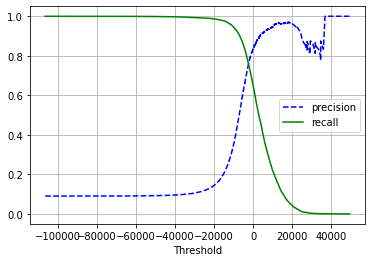

In [21]:
def plot_precision_recall_curve(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label = 'precision')
    plt.plot(thresholds,recalls[:-1],'g-',label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()

plot_precision_recall_curve(precisions,recalls,thresholds)
plt.show()

In [22]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [23]:
threshold_90_precision

3370.0194991439557

In [24]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [25]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [26]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

## Receiver Operating Charactersitic

In [27]:
from sklearn.metrics import roc_curve

In [28]:
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [29]:
def plot_roc_curve(fpr,tpr,label):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')
#     plt.label()
    plt.grid()
    plt.legend()

No handles with labels found to put in legend.


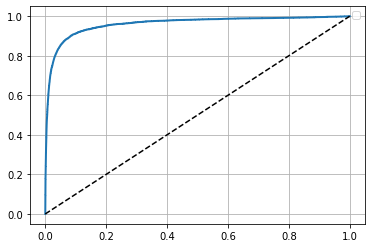

In [30]:
plot_roc_curve(fpr,tpr,None)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [32]:
#using Random Forest Classifer as a comparison against the SGD Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method = 'predict_proba')

In [33]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [34]:
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

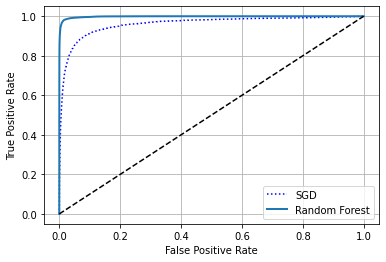

In [35]:
plt.plot(fpr,tpr,"b:",label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")

plt.legend(loc = "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [36]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [37]:
# y_pred_90_forest = (y_train_)
# forest_clf.fit(X_train,y_train_5)
# precision_score(y_train_5,forest_clf.predict(X_train))
cross_val_score(forest_clf,X_train,y_train_5,cv=3,scoring = "recall")

array([0.88157167, 0.85777532, 0.85943553])

## Multi-Class (Multinomial) Classification

In [38]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
# svm_clf.predict()

SVC()

## Scikit chooses the one vs one and One vs rest strategy automatically, based on the ML model --- however it can be specified explicitly as well
Use OneVsRestClassifier library from the sklearn.multiclass library

In [ ]:
sgd_clf.fit(X_train,y_train)
sgd_clf.decision_function(X_train[0,:])

In [41]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)

In [42]:
conf_mx

array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]])

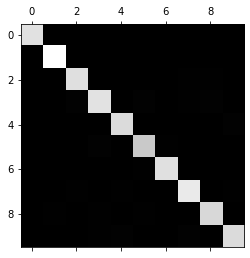

In [43]:
plt.matshow(conf_mx,cmap = plt.cm.gray)
plt.show()

In [44]:
row_sums = conf_mx.sum(axis=1,keepdims = True)
norm_conf_mx = conf_mx/row_sums

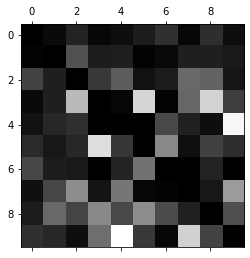

In [45]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.show()

## Multi Label Classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier   #supports multilabel classification

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

# knn_clf.predict(X_train[0,:])

KNeighborsClassifier()

In [50]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
knn_clf.predict(X_train[0,:].reshape(1,-1))

array([[False,  True]])

In [54]:
y_train[0]

5

### Evaluation of Multilabel classification

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average = 'macro') ## asssumes all classes have equal weights - however 
### average = 'weighted'

## Multilabel - Multioutput Classification (Blurred lines with Regression - since the task is more similar to regression

In [56]:
noise_train = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise_train

noise_test = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise_test

y_train = X_train
y_test = X_test

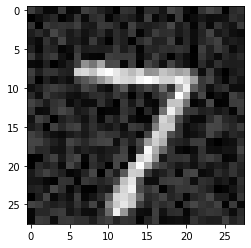

In [67]:
plt.imshow(X_test_mod[0].reshape(28,28),cmap = 'gray')

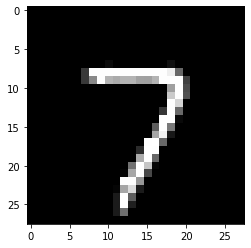

In [69]:
knn_clf.fit(X_train_mod, y_train)
clean_digit = knn_clf.predict(X_test_mod[0].reshape(1,-1))
plt.imshow(clean_digit.reshape(28,28),cmap = 'gray')

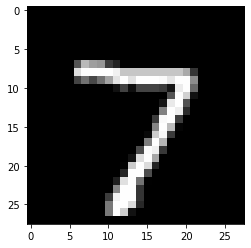

In [70]:
plt.imshow(y_test[0].reshape(28,28),cmap = 'gray')